In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])

In [5]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [6]:
df.tail()

,Values
99,47.654129
100,10.000000
101,110.000000
102,5.000000
103,120.000000


**using scatter plot**

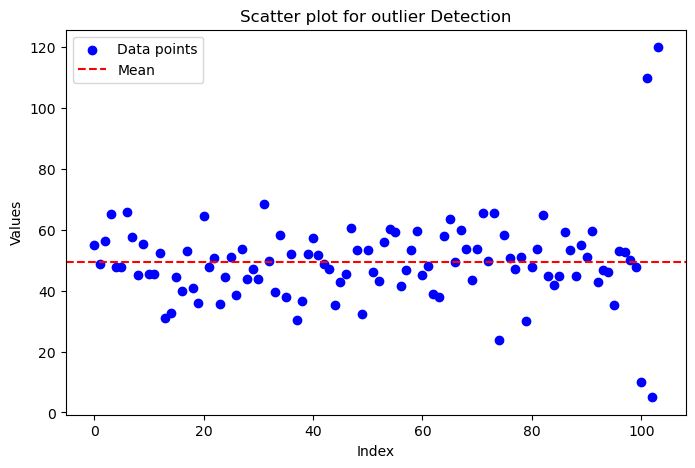

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier Detection")
plt.legend()
plt.show()

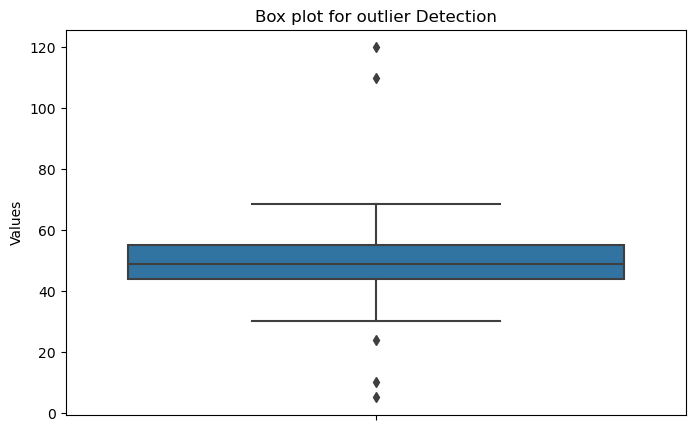

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box plot for outlier Detection")
plt.show()

**Z-Score Method**
**formula=z=x-μ/σ**

In [9]:
df['Z-Score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-Score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z'] == 'Outlier'])

     Values   Z-Score Outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**Interquartile Range
IQR=Q3-Q1**

In [10]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+ 1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x: 'Outlier' if (x<lower_bound or x>upper_bound) else 'Normal')
print(df[df['Outlier_IQR']== 'Outlier'])

         Values   Z-Score Outlier_Z Outlier_IQR
74    23.802549 -1.831694    Normal     Outlier
100   10.000000 -2.818056    Normal     Outlier
101  110.000000  4.328173   Outlier     Outlier
102    5.000000 -3.175368   Outlier     Outlier
103  120.000000  5.042796   Outlier     Outlier


In [11]:
import numpy as np

data = np.random.randint(1, 100, size=20) 
minimum = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
maximum = np.max(data)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]

print(f"Minimum (Q0): {minimum}")
print(f"First Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"Third Quartile (Q3): {q3}")
print(f"Maximum (Q4): {maximum}")
print(f"Interquartile Range (IQR): {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")


Minimum (Q0): 2
First Quartile (Q1): 30.0
Median (Q2): 51.5
Third Quartile (Q3): 62.0
Maximum (Q4): 97
Interquartile Range (IQR): 32.0
Lower Bound: -18.0
Upper Bound: 110.0
Outliers: []
